# Intro to Machine Learning: Homework 1

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Problem 1

### Part (a)

First, prepare the data. Since the times are complete and equally spaced, we simply use 0, 1, 2, ...

In [2]:
# read the data from the temperature csv file
data = pd.read_csv('../data/daily-min-temperatures.csv').to_numpy()

# extract the temperatures
y = data[:, 1]

# use 0, 1, 2, ... for the days
X = np.zeros([y.shape[0], 1])
X[:, 0] = [i for i in range(y.shape[0])]


# split the data into training and test sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25)

Second, bring in the linear regression code from class.

In [3]:
class OrdinaryLeastSquaresExact:
    def __init__(self, fit_intercept = True):
        self.fit_intercept = fit_intercept
    
    # fit the model to the data
    def fit(self, X, y):
        # add a column of ones to the X matrix
        if self.fit_intercept:
            X = np.hstack((np.ones([X.shape[0], 1]), X))
        
        # find the theta values that minimize the sum of squared errors
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
                
    # predict the output from input (testing) data
    def predict(self, X):
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        if self.fit_intercept:
            X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of beta from the fit function to each testing datapoint
        for row in range(X.shape[0]):
            yPredicted[row] = self.theta @ X[row,]
            
        return yPredicted

Third, fit the model and test it on the training set.

The r^2 score is 1.2069400821879128e-05
The mean absolute error on the training set is 3.3002260007466235
The mean absolute error on the test set is 3.2311277000754353


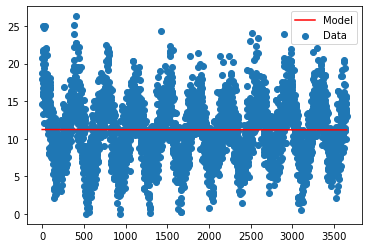

In [4]:
# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

# plot the data
plt.scatter(X, y, label = 'Data')

# plot the model
xModel = np.linspace(X[0], X[-1], 100000)
yModel = model.predict(xModel)
plt.plot(xModel, yModel, 'r', label = 'Model')

plt.legend()

The fit is pretty bad, but it is the "best" line for the data in that it minimizes the squared error loss function. The issue is that required the model to be linear in time, which simply cannot characterize the data well because it is cyclical.

### Part (b) Linear Basis Functions

Clearly, the assumption that the model is a line is badly flawed, so we need an alternative that can actually be shaped like the data. The data looks much like a cosine curve, so let's try the model

$$\hat{f}(x_i) = \theta_0 + \theta_1\cos(x_i)$$

We have learned that fitting linear basis functions is not difficult: we simply need to preprocess the data by applying the function we have chosen, do let's do that.

In [5]:
# create the cosine function
f = lambda x: np.cos(x)

# preprocess the data
Xh = f(X)

# split the data into train and test data
trainX, testX, trainY, testY = train_test_split(Xh, y, test_size = 0.25)

Now, let's test the model.

The predicted coefficients are [11.149612110403208 -0.015441689692213323]
The r^2 score is 7.2382128283310365e-06
The mean absolute error on the training set is 3.284720270477187
The mean absolute error on the test set is 3.2709172875562467


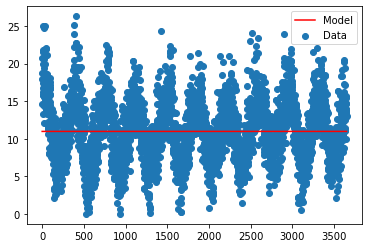

In [6]:
# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

print('The predicted coefficients are', model.theta)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

# plot the data
plt.scatter(X, y, label = 'Data')

# plot the model
xModel = np.linspace(X[0], X[-1], 100000)
yModel = model.predict(model.theta[0] + model.theta[1] * f(xModel))
plt.plot(xModel, yModel, 'r', label = 'Model')

plt.legend()

Note that the y-intercept looks good, it is near the center of the data, but the coefficient of the cosine has gone to 0. Why? Well, the period of cosine is $2\pi$, but the period of the data is probably 1 year! So, let's try again with a modified period for the cosine

$$\hat{f}(x_i) = \beta_0 + \beta_1\cos\left(\frac{2\pi x}{365.25}\right)$$

So, now, the period is 365.25 days. Better yet, the first day of the data is Jan 1 and corresponds to time 0. Cosine reaches its max at time 0, but, according to [Weather Spark](https://weatherspark.com/y/144227/Average-Weather-in-Melbourne-Australia-Year-Round), temperatures peak in Melbourne, Australia on Feb 3, 34 days later, so let's shift the model to the right by 34 days as well.

$$\hat{f}(x_i) = \beta_0 + \beta_1\cos\left(\frac{2\pi (x + 34)}{365.25}\right)$$

Let's try this.

In [7]:
# create the cosine function
f = lambda x: np.cos(2 * np.pi * (x - 34) / 365.25)

# preprocess the data
Xh = f(X)

# split the data into train and test data
trainX, testX, trainY, testY = train_test_split(Xh, y, test_size = 0.25)

The predicted coefficients are [11.221533408655786 4.1750421483850895]
The r^2 score is 0.5207242280225424
The mean absolute error on the training set is 2.2107337335472255
The mean absolute error on the test set is 2.2396333779461433


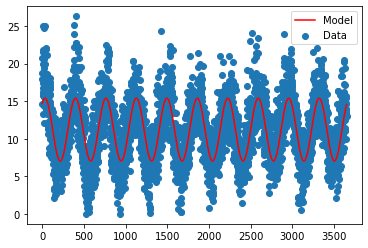

In [8]:
# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

print('The predicted coefficients are', model.theta)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

# plot the train data
plt.scatter(X, y, label = 'Data')

# plot the model
xModel = np.linspace(X[0], X[-1], 100000)
yModel = model.predict(f(xModel))
plt.plot(xModel, yModel, 'r', label = 'Model')

plt.legend()

Here, we have a much better result!

#### A failed attempt to do better ¯\\\_(ツ)\_/¯

In [9]:
# return polynomial basis functions for degree M and d=1
def cosines(M):
    def cosM(x):
        # create an empty array
        out = np.array([])
        out = np.append(out, 1)
        out = np.append(out, np.cos(2 * np.pi * (x - 34) / 365.25))
        out = np.append(out, np.cos(2 * np.pi * (x - 34) / 365.25 + np.pi))
        
        # create the output
        for i in range(1, M):
            # append cos^n
            #div = 2 - (i % 2)
            out = np.append(out, np.cos((2 * np.pi * (x - 34) / 365.25) / 2) ** (2 * i))
            out = np.append(out, np.cos((2 * np.pi * (x - 34) / 365.25 + np.pi) / 2) ** (2 * i))
        
        # return the polynomial values
        return out
        
    # return the polynomial function
    return cosM

[[ 1.00000000e+00  8.33777013e-01 -8.33777013e-01 ...  5.74094333e-04
   7.06750485e-01  4.77138375e-05]
 [ 1.00000000e+00  8.43150662e-01 -8.43150662e-01 ...  4.82345337e-04
   7.21312342e-01  3.78277735e-05]
 [ 1.00000000e+00  8.52274809e-01 -8.52274809e-01 ...  4.02970909e-04
   7.35701597e-01  2.97644773e-05]
 ...
 [ 1.00000000e+00  7.77889694e-01 -7.77889694e-01 ...  1.36967063e-03
   6.24452297e-01  1.52108982e-04]
 [ 1.00000000e+00  7.88584084e-01 -7.88584084e-01 ...  1.18119895e-03
   6.39613268e-01  1.24862130e-04]
 [ 1.00000000e+00  7.99045118e-01 -7.99045118e-01 ...  1.01439172e-03
   6.54708890e-01  1.01923484e-04]]


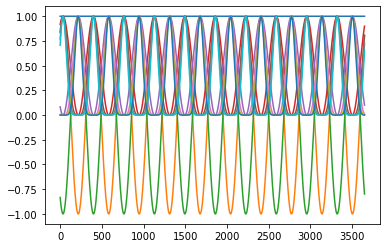

In [10]:
from sklearn.preprocessing import scale

M = 5
cosPow = cosines(M)

Xh = np.apply_along_axis(cosPow, 1, X)

trainX, testX, trainY, testY = train_test_split(Xh, y, test_size = 0.25)

print(Xh)
#Xh = scale(Xh)

for i in range(Xh.shape[1]):
    plt.plot(Xh[:,i])

The r^2 score is 0.5264228552627397
The mean absolute error on the training set is 2.223466690726902
[-3.97700140e+13  5.75936229e+13 -3.47957841e+13  4.31631184e+12
  7.18080595e+13 -3.39808536e+13  4.42278235e+13 -4.24940460e+13
  3.56627327e+13  1.95391947e+13 -1.95391947e+13]
The mean absolute error on the test set is 2.1633131179726006


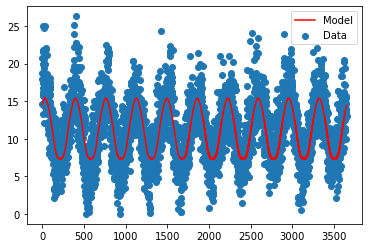

In [11]:
from sklearn.linear_model import LinearRegression

# instantiate an OLS model
#model = OrdinaryLeastSquaresExact(fit_intercept = False)
model = LinearRegression(fit_intercept = False)

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

#print(model.theta)
print(model.coef_)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

# plot the train data
plt.scatter(X, y, label = 'Data')

# plot the model
xModel = X
#yModel = np.sum(model.theta * np.apply_along_axis(cosPow, 1, xModel), axis = 1)
yModel = np.sum(model.coef_ * np.apply_along_axis(cosPow, 1, xModel), axis = 1)

plt.plot(xModel, yModel, 'r', label = 'Model')

plt.legend()

## Problem 2

### Part (a)

First, prepare the data. (Note that I previously converted one sheet of the Excel file to a csv file.)

In [9]:
# read the data from the power plant csv file
data = pd.read_csv('../data/CCPP.csv').to_numpy()

# extract the input variables (all except the last column)
X = data[:, :-1]

# extract the output variable (the last column only)
y = data[:, -1]

# split the data into training and test sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25)

We already saved the OLS linear regression method above, so we can reuse it.

In [10]:
# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

The r^2 score is 0.9289780771862386
The mean absolute error on the training set is 3.6494658038331504
The mean absolute error on the test set is 3.5616184029712885


Here, the linear model fits extraordinarily well!

### Part (b)

First, create the quadratic linear basis in variables $X_1$, $X_2$, $X_3$, and $x_4$ so we can fit the function

$$\hat{f}(x_i) = \theta_0 + \theta_1x_{i1} + \theta_2x_{i2} + \theta_3x_{i3} + \theta_4x_{i4} + \theta_{11}x_{i1}^2 + \theta_{22}x_{i2}^2 + \theta_{33}x_{i3}^2 + \theta_{44}x_{i4}^2 + \theta_{12}x_{i1}x_{i2} + \theta_{13}x_{i1}x_{i3} + \theta_{14}x_{i1}x_{i4} + \theta_{23}x_{i2}x_{i3} + \theta_{24}x_{i2}x_{i4} + \theta_{34}x_{i3}x_{i4}$$

Then, the code is

In [11]:
def LBFs():
    def quad4(x):
        out = np.array([])
        out = np.append(out, 1)
        
        for i in range(4):
            out = np.append(out, x[i])
            out = np.append(out, x[i] ** 2)
            
        out = np.append(out, x[0] * x[1])
        out = np.append(out, x[0] * x[2])
        out = np.append(out, x[0] * x[3])
        out = np.append(out, x[1] * x[2])
        out = np.append(out, x[1] * x[3])
        out = np.append(out, x[2] * x[3])
            
        return out
    
    return quad4

Second, preprocess the data with the linear basis functions.

In [12]:
# create the linear basis functions
basis = LBFs()

# preprocess the data
Xh = np.apply_along_axis(basis, 1, X)

# split the data into train and test data
trainX, testX, trainY, testY = train_test_split(Xh, y, test_size = 0.25)

Third, fit the model and test it.

In [13]:
# instantiate an OLS model
model = OrdinaryLeastSquaresExact(fit_intercept = False)

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

The r^2 score is 0.9383265397146572
The mean absolute error on the training set is 3.3472727395726465
The mean absolute error on the test set is 3.36477263563953


The results are slightly better on the training set, but actually worse on the test set. This more complex quadratic model actually generalizes to test data a bit worse than the simpler linear model.